# WEEK 5 PART 2

Name: MUSA T GANIYU

Course: DATA 620 (Web Analytics)

Assignment: 5 Part 2 (Document Classification)


The dataset/Text files to be used for the analysis can be accessed from the underlisted webpage.

http://archive.ics.uci.edu/ml/datasets/Spambase 


* In this assignement, I am going to extract the contents of the files and load it to our jupyter environment for analysis. 


In [402]:
rm(list =ls())

Please, kindly install and load the following libraries into your environment if you have not done that already.

In [403]:
options(warn = -1)
suppressMessages(library(tm))
suppressMessages(library(tidyr))
suppressMessages(library(stringr))
suppressMessages(library(dplyr))
suppressMessages(library(rpart))
suppressMessages(library(SnowballC))
suppressMessages(library(knitr))
suppressMessages(require(RTextTools))
suppressMessages(require(e1071))
suppressMessages(library(nnet));


The two text files below are read into R environment and combined as a single file for easy access.

In [404]:
spam <- readLines("https://raw.githubusercontent.com/mascotinme/MSDA-IS607/772b359fe7cb65505be4ef38b1541435949f5e12/spam.csv")

ham <- readLines("https://raw.githubusercontent.com/mascotinme/MSDA-IS607/772b359fe7cb65505be4ef38b1541435949f5e12/ham.csv")

spam_ham <- rbind(spam, ham)
str(spam_ham) # The text/data structure

 chr [1:2, 1:124] "ï»¿From 12a1mailbot1@web.de  Thu Aug 22 13:17:22 2002" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:2] "spam" "ham"
  ..$ : NULL


# Data cleaning:

Before we can do any analysis whatsoever on the file, we need to remove all the unwanted characters in the text.

In [405]:
spam_ham = gsub("[[:punct:]]", "", spam_ham)

spam_ham = gsub("[[:digit:]]", "", spam_ham)

spam_ham = gsub("ï", "", spam_ham)

spam_ham = gsub("[ \t]{2,}", "", spam_ham)

spam_ham = gsub("\tby", "", spam_ham)
spam_ham = gsub("\tfor", "", spam_ham)
spam_ham = gsub("zzzz", "", spam_ham)
spam_ham = gsub("[[,:digit:]]", "", spam_ham)


In [406]:
review_text <- paste(spam_ham, collapse = " ") # Further Cleaning
head(review_text)


[1] "From amailbotwebdeThu Aug From exmhworkersadminredhatcomThu Aug ReturnPath amailbotwebde ReturnPath exmhworkersadminexamplecom DeliveredTo localhostspamassassintaintorg DeliveredTo localhostnetnoteinccom Received from localhost localhost  Received from localhost localhost   phoboslabsspamassassintaintorg Postfix with ESMTP id BC  phoboslabsnetnoteinccom Postfix with ESMTP id DEC  localhost ThuAugEDT  localhost ThuAugEDT Received from mailwebnotenet  Received from phobos   localhost with POP fetchmail  localhost with IMAP fetchmail  localhost singledrop ThuAugIST  localhost singledrop ThuAugIST Received from ddit  Received from listmanexamplecom listmanexamplecomby  webnotenetwith ESMTP id NAA dogmaslashnullorgwith ESMTP id gMBYrZ for  spamassassintaintorg ThuAug exmhexamplecom ThuAug From amailbotwebde Received from listmanexamplecom localhostlocaldomainby Received from rsmtpkoreacomby dditwith Microsoft SMTPSVC listmanredhatcom Postfix with ESMTP idThuAug  SatAug EDT To dcekanetsgocom DeliveredTo exmhworkerslistmanexamplecom Subject Life InsuranceWhy Pay More Received from intmxcorpexamplecom intmxcorpexamplecom Date WedAug by listmanredhatcom Postfix with ESMTP id CFD MIMEVersion  for exmhworkerslistmanredhatcom ThuAug MessageID cDDITddit EDT ContentType texthtml charsetiso Received from maillocalhost by intmxcorpexamplecom  ContentTransferEncoding quotedprintable id gMBYg for exmhworkerslistmanredhatcom ThuAug    DOCTYPE HTML PUBLIC WCDTD HTMLTransitionalEN Received from mxexamplecom mxexamplecomby HTMLHEAD intmxcorpredhatcomwith SMTP id gMBYY for META contentDtexthtml charsetDwindows httpequivDContentT exmhworkersredhatcom ThuAug ype Received from ratreepsuacthby mxexamplecom META contentDMSHTMLnameDGENERATORHEAD with SMTP id gMBIhl for exmhworkersredhatcom BODY Inserted by Calypso  ThuAug TABLE borderD cellPaddingD cellSpacingD idDCalyPrintHeader r Received from deltacsmuOZAU deltacoepsuacthby ulesDnone  ratreepsuacthwith ESMTP id gMBWel styleDCOLOR black DISPLAY none widthD ThuAugICT TBODY Received from munnariOZAU localhostby deltacsmuOZAU TR with ESMTP id gMBQPW ThuAug TD colSpanD ICT HR colorDblack noShade SIZED From Robert Elz kremunnariOZAU TDTRTDTR To Chris Garrigues cwgdatedfadDeepEddyCom TR Cc exmhworkersexamplecom TD colSpanD Subject Re New Sequences Window HR colorDblack noShade SIZED InReplyTo TMDAdeepeddyvirciocom TDTRTBODYTABLE End CalypsoInserted by Calypso References TMDAdeepeddyvirciocom  FONT  TMDAdeepeddyvirciocom munnariOZAU colorD faceDVERDANAARIALHELVETICA sizeDBRFONTTD TMDAdeepeddyvirciocom TRTABLE End Calypso FONT colorDff  TMDAdeepeddyvirciocom faceDCopperplate Gothic Bold sizeD PTSIZED MIMEVersion  CENTERSave up toon Life InsuranceCENTERFONTFONT colorDff ContentType textplain charsetusascii   MessageId munnariOZAU faceDCopperplate Gothic Bold sizeD PTSIZED XLoop exmhworkersexamplecom CENTERWhy Spend More Than You Have To Sender exmhworkersadminexamplecom CENTERFONT colorDff faceDCopperplate Gothic Bold sizeD PT ErrorsTo exmhworkersadminexamplecom SIZED XBeenthere exmhworkersexamplecom CENTERLife Quote Savings XMailmanVersion  CENTER Precedence bulk P alignDleftP ListHelp mailtoexmhworkersrequestexamplecomsubjecthelp P alignDleftPFONTUIBBRFONTUBUI ListPost mailtoexmhworkersexamplecom PP ListSubscribe httpslistmanexamplecommailmanlistinfoexmhworkers CENTER mailtoexmhworkersrequestredhatcomsubjectsubscribe TABLE borderD borderColorD cellPaddingD cellSpacingD wi ListId Discussion list for EXMH developers exmhworkersexamplecom dthD ListUnsubscribe httpslistmanexamplecommailmanlistinfoexmhworkers TBODYTBODYTABLE mailtoexmhworkersrequestredhatcomsubjectunsubscribe TABLE borderD borderColorD cellPaddingD cellSpacingD wi ListArchive httpslistmanexamplecommailmanprivateexmhworkers dthD Date ThuAug TBODY  TR DateWedAug TD colSpanD widthDBFONT faceDVerdana sizeDEnsurin FromChris Garrigues cwgdatedfadDeepEddyCom g your  MessageIDTMDAdeepeddyvirciocom familys financial security is very important Life Quot

# Data Conversion

We are going to convert the file into Corpus Vector. This will enable us to analysis the document.

In [407]:
corpus <- Corpus(VectorSource(review_text))
head(inspect(corpus))

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] From amailbotwebdeThu Aug From exmhworkersadminredhatcomThu Aug ReturnPath amailbotwebde ReturnPath exmhworkersadminexamplecom DeliveredTo localhostspamassassintaintorg DeliveredTo localhostnetnoteinccom Received from localhost localhost  Received from localhost localhost   phoboslabsspamassassintaintorg Postfix with ESMTP id BC  phoboslabsnetnoteinccom Postfix with ESMTP id DEC  localhost ThuAugEDT  localhost ThuAugEDT Received from mailwebnotenet  Received from phobos   localhost with POP fetchmail  localhost with IMAP fetchmail  localhost singledrop ThuAugIST  localhost singledrop ThuAugIST Received from ddit  Received from listmanexamplecom listmanexamplecomby  webnotenetwith ESMTP id NAA dogmaslashnullorgwith ESMTP id gMBYrZ for  spamassassintaintorg ThuAug exmhexamplecom ThuAug From amailbotwebde Received from listmanexamplecom localhostlocaldomainby Received from rsmtpkoreacom

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

From the above text, we can see that there are still some cleaning to be done! So, we have no time to waste, let the work begins!!!

In [408]:
corpus = tm_map(corpus, content_transformer(tolower)) # Convert to lower character
corpus = tm_map(corpus, removeNumbers) # remove any numeric/number
corpus = tm_map(corpus, removePunctuation) #remove Punctuations
corpus = tm_map(corpus, removeWords, c("the", "and", stopwords("english"))) # remove some conjuctions
corpus = tm_map(corpus, stripWhitespace) # Omit the whitespaces

inspect(corpus[]) # Lets inspect the text now!

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1]  amailbotwebdethu aug exmhworkersadminredhatcomthu aug returnpath amailbotwebde returnpath exmhworkersadminexamplecom deliveredto localhostspamassassintaintorg deliveredto localhostnetnoteinccom received localhost localhost received localhost localhost phoboslabsspamassassintaintorg postfix esmtp id bc phoboslabsnetnoteinccom postfix esmtp id dec localhost thuaugedt localhost thuaugedt received mailwebnotenet received phobos localhost pop fetchmail localhost imap fetchmail localhost singledrop thuaugist localhost singledrop thuaugist received ddit received listmanexamplecom listmanexamplecomby webnotenetwith esmtp id naa dogmaslashnullorgwith esmtp id gmbyrz spamassassintaintorg thuaug exmhexamplecom thuaug amailbotwebde received listmanexamplecom localhostlocaldomainby received rsmtpkoreacomby dditwith microsoft smtpsvc listmanredhatcom postfix esmtp idthuaug sataug edt dcekanetsgoc

In [409]:
class(corpus) # Checking the class

[1] "SimpleCorpus" "Corpus"

The next step is the conversion to Document Term Matrix and to also remove the Sparse Terms

In [410]:

dtm <- DocumentTermMatrix(corpus)
dtm <- removeSparseTerms(dtm, 0.95)
dtm

<<DocumentTermMatrix (documents: 1, terms: 363)>>
Non-/sparse entries: 363/0
Sparsity           : 0%
Maximal term length: 51
Weighting          : term frequency (tf)

# Graphical Representation

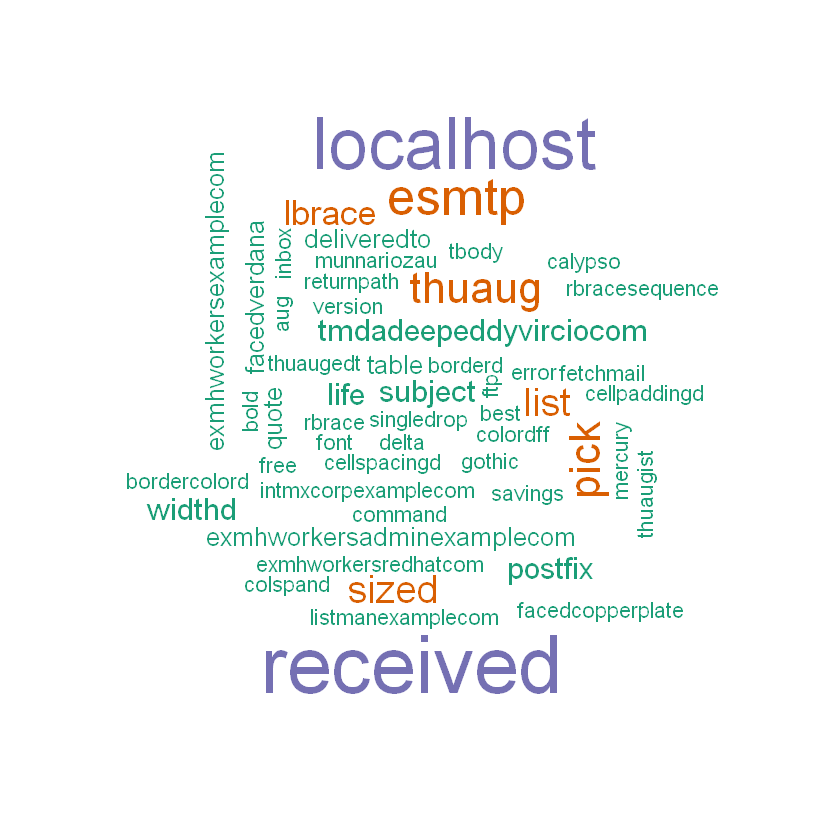

In [411]:
   
freq = data.frame(sort(colSums(as.matrix(dtm)), decreasing=TRUE))
wordcloud(rownames(freq), freq[,1], max.words=500, colors=brewer.pal(1, "Dark2"))


In [412]:
findFreqTerms(dtm, 5)

[1] "esmtp"                 "lbrace"                "life"                 
 [4] "list"                  "localhost"             "pick"                 
 [7] "postfix"               "received"              "sized"                
[10] "subject"               "thuaug"                "tmdadeepeddyvirciocom"
[13] "widthd"

In [413]:
ham <- as.factor(apply(as.matrix(spam_ham[1], mode="character"),1,paste,"V1",sep="",collapse=""))
spam <- as.factor(apply(as.matrix(spam_ham[2], mode="character"),1,paste,"V1", sep="",collapse=""))

training_data <- cbind(spam_ham[,], ham, spam) 

training_data_samp = sample(nrow(training_data),nrow(training_data)*0.80)
training_data.train <- training_data[training_data_samp, ] 
training_data.test <- training_data[-training_data_samp]

In [414]:
head(training_data.train)

"From exmhworkersadminredhatcomThu Aug" 
                                                     
             "ReturnPath exmhworkersadminexamplecom" 
                                                     
                "DeliveredTo localhostnetnoteinccom" 
                                                     
                "Received from localhost localhost " 
                                                     
" phoboslabsnetnoteinccom Postfix with ESMTP id DEC" 
                                                     
                              " localhost ThuAugEDT"

# THANK YOU AND GOD BLESS